In [19]:
import numpy as np
import pandas as pd
import os
from collections import defaultdict
import math
import json

from tfRIM import RIMCell
from tensorflow import keras

from gcd_data_manipulation import prepare_data

In [20]:
def rmse(yhat, y):
    return np.sqrt(np.mean((y-yhat))**2)

def rmspe(yhat, y):
    return rmse(yhat, y) / np.mean(y)

def rmsse(yhat, y):
    e_2 = (y - yhat)
    m = 1 / (len(y) - 1)
    t = np.sum(abs(np.delete((y - np.roll(y, 1)), 0)))
    return np.sqrt(np.mean((e_2 / (m * t))**2))

def rmsse_multitarget(yhat, y):
    e = y - yhat
    t0 = np.mean(abs((y - np.roll(y, 1))[1:]))
    t1 = np.mean(abs((y - np.roll(y, 2))[2:]))
    t2 = np.mean(abs((y - np.roll(y, 3))[3:]))
    return np.sqrt(np.mean((e / np.mean(t0 + t1 + t2))**2))

In [21]:
with open('columns_selection.json') as f:
    columns_selection = json.load(f)

job_id = 6318371744

columns_to_consider = columns_selection['GWT_efficiency_1']

data = prepare_data(f'../data/task-usage_job-ID-{job_id}_total.csv', columns_to_consider, targets=[0, 1, 2])
results = defaultdict(list)

test_x = data[:32, :-3]
test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1])
test_y = data[:32, -3:]

In [22]:
model = keras.models.load_model(
    f'../models/rim_model_exp_rim_multi', custom_objects = {'RIMCell': RIMCell}
)

yhat = model.predict(test_x)

1/1 [==============================] - 1s 708ms/step


In [26]:
print(f'{rmse(yhat, test_y) =}')
print(f'{rmsse_multitarget(yhat, test_y) =}')
print(f'{rmspe(yhat, test_y) =}')

rmse(yhat, test_y) =0.06584001332521439
rmsse_multitarget(yhat, test_y) =1.0775357
rmspe(yhat, test_y) =0.13101891948889186


In [24]:
yhat.shape

(32, 3)

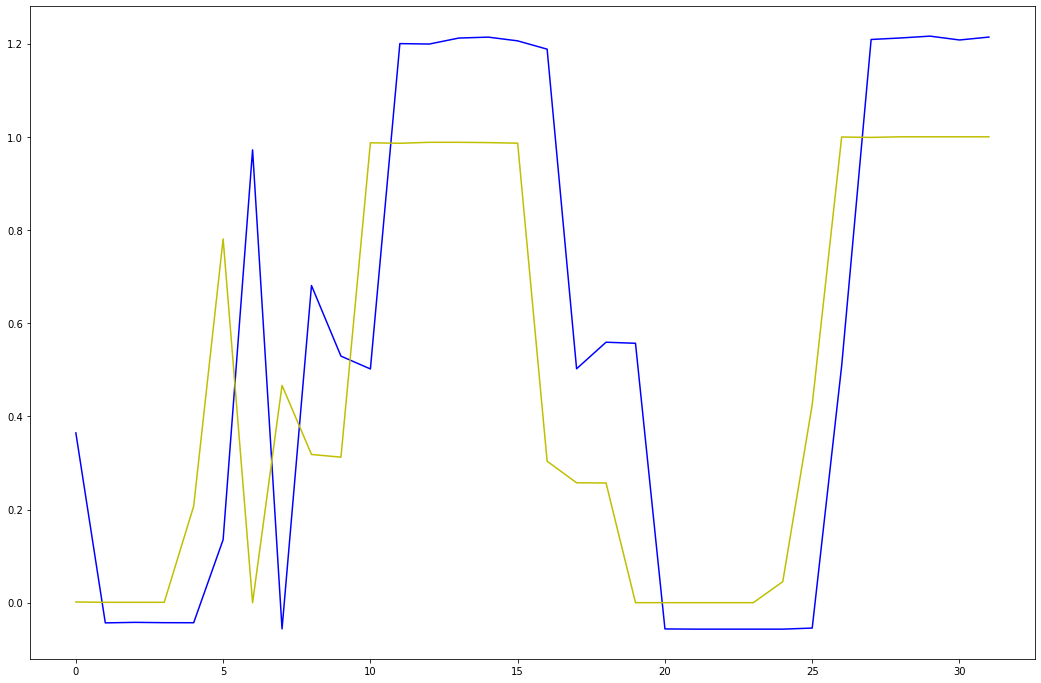

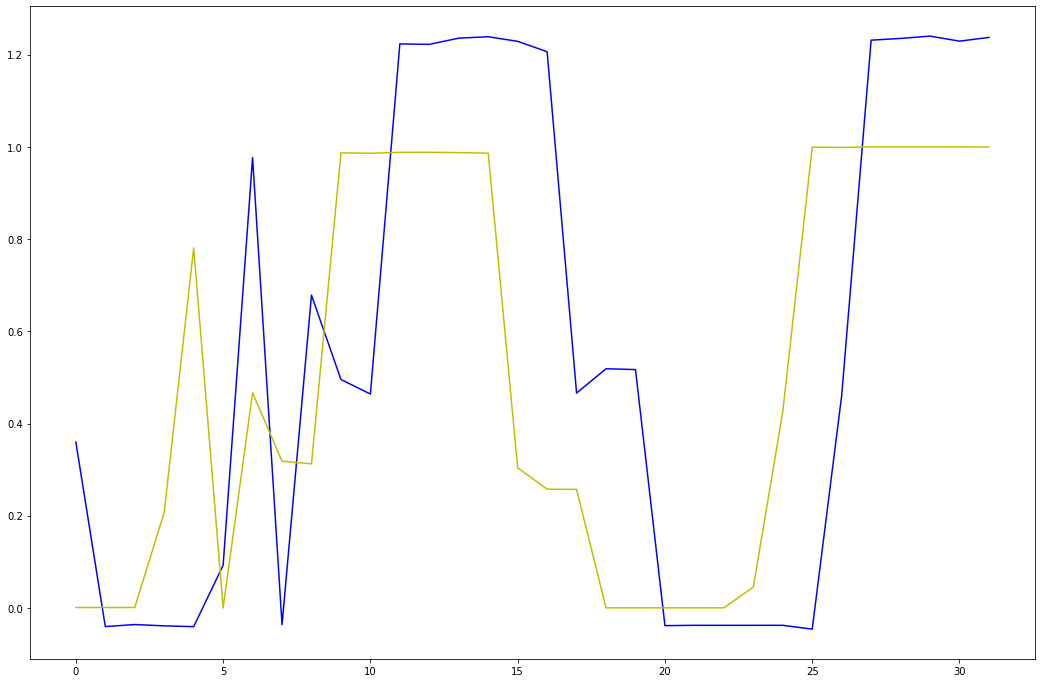

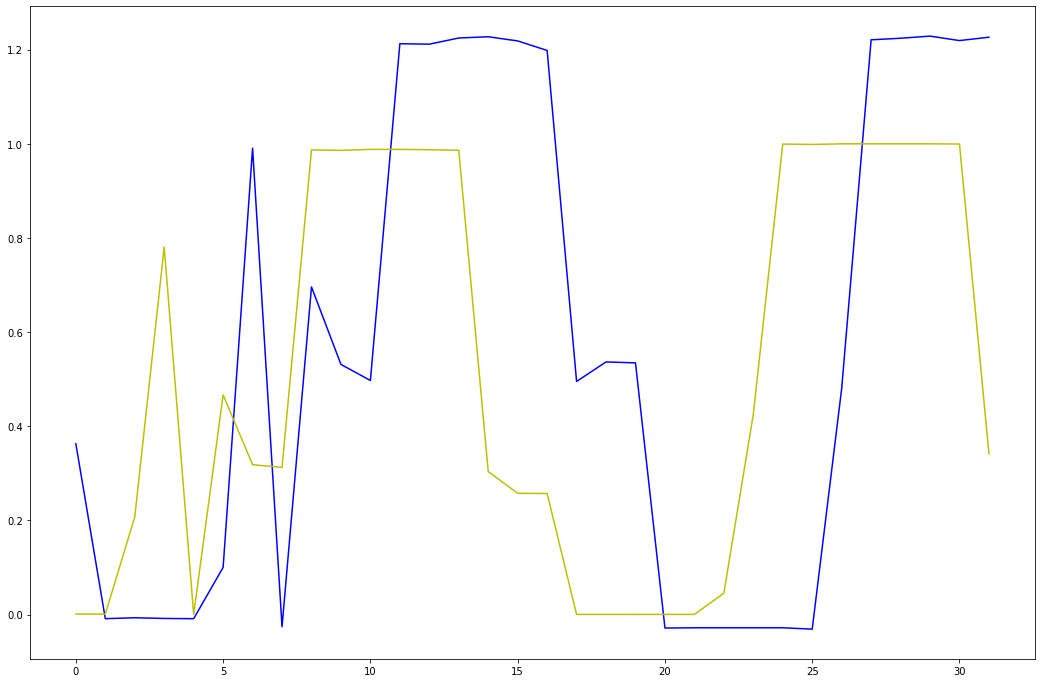

In [25]:
import matplotlib.pyplot as plt

for i in range(0, yhat.shape[1]):
    plt.figure(figsize=(18, 12))
    plt.plot([x[i] for x in yhat], c='b')
    plt.plot([x[i] for x in test_y], c='y')
    plt.show()